In [1]:
!pip install selenium

In [2]:
import re
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from selenium import webdriver

In [3]:
path = r"C:\Users\prasa\Downloads\edgedriver_win64\msedgedriver.exe"

In [4]:
from selenium.webdriver.edge.service import Service
from selenium.webdriver.edge.options import Options

In [5]:
service = Service(executable_path = path)
options = webdriver.EdgeOptions()

In [6]:
driver = webdriver.Edge(service=service, options= options)

In [7]:
driver.get('https://www.booking.com/searchresults.en-gb.html?label=msn-HiTydpHndf_KligNqm9Sgw-79852220055838%3Atikwd-79852393960302%3Aloc-90%3Aneo%3Amte%3Alp157375%3Adec%3Aqsbooking.com&aid=2369661&ss=Hyderabad%2C+India&lang=en-gb&sb=1&src_elem=sb&src=index&dest_id=-2097701&dest_type=city&checkin=2023-11-24&checkout=2023-11-25&group_adults=2&no_rooms=1&group_children=0&sb_travel_purpose=leisure&offset=75')

In [8]:
soup = BeautifulSoup(driver.page_source, "html.parser")

In [9]:
soup

<html class="b_chrome b_chrome_119 supports_inline-block supports_flexbox_unprefixed supports_fontface hasJS" dir="ltr" lang="en-gb" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# booking_com: http://ogp.me/ns/fb/booking_com#"><head><script async="" src="https://www.google.com/recaptcha/api.js?render=6LfzopcUAAAAAPh4ue2iRjzP6XdxDVpwJigtlmeD&amp;onload=onLoadRecaptchaV3Callback&amp;_=1700227466208"></script><script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-5Q664QZ"></script><script async="" nonce="" src="https://www.google-analytics.com/plugins/ua/ec.js" type="text/javascript"></script><script async="" src="//www.google-analytics.com/analytics.js"></script><script nonce="" type="text/javascript">
document.addEventListener('DOMContentLoaded', function () {
/**
* provides the current user's cookie consent
* in order to use it:
* 1. inline privacy/cookieConsent.js in the page you need to use it.
* please note that this library relies on window.PCM.isCountryNeedCo

In [10]:
soup.find('span',class_='aee5343fdb def9bc142a').text

'HITEC City, Hyderabad'

In [11]:
Title=[]
location=[]
price=[]
rating=[]
reviewers=[]
TandC=[]
opinion=[]
dfc=[]


for i in range(0,101,25):
    url=f'https://www.booking.com/searchresults.en-gb.html?label=msn-HiTydpHndf_KligNqm9Sgw-79852220055838%3Atikwd-79852393960302%3Aloc-90%3Aneo%3Amte%3Alp157375%3Adec%3Aqsbooking.com&aid=2369661&ss=Hyderabad%2C+India&lang=en-gb&sb=1&src_elem=sb&src=index&dest_id=-2097701&dest_type=city&checkin=2023-11-24&checkout=2023-11-25&group_adults=2&no_rooms=1&group_children=0&sb_travel_purpose=leisure&offset={i}'
    driver.get(url)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    for i in soup.find_all('div',class_='f6431b446c a15b38c233'):
        k=i.text
        if k:
            Title.append(k)
        else:
            Title.append(np.nan)
    for i in soup.find_all('span',class_='aee5343fdb def9bc142a'):
        k=i.text
        
        regex=re.findall('.*(Hyderabad)',k)
        if len(regex)==1:
            location.append(regex[0])
    
    for i in soup.find_all('span',class_='f6431b446c fbfd7c1165 e84eb96b1f'):
        k=i.text
        regex=re.findall('\d.+',k)
        if regex:
            price.append(regex[0].replace(',',''))
        else:
            price.append(np.nan)
    for i in soup.find_all('div',class_='a3b8729ab1 d86cee9b25'):
        k=i.text
        if k:
            rating.append(k)
        else:
            rating.append(np.nan)
    for i in soup.find_all('div',class_='abf093bdfe f45d8e4c32 d935416c47'):
        k=i.text
        regex=re.findall('(.*)reviews',k)
        if regex:
            reviewers.append(regex[0].replace(',',''))
        else:
            reviewers.append(np.nan)
    for i in soup.find_all('div',class_='abf093bdfe f45d8e4c32'):
        k=i.text
        regex=re.findall('(\d.+)\staxes',k)
        if regex:
            TandC.append(regex[0].replace(',',''))
    for i in soup.find_all('div',class_='a3b8729ab1 e6208ee469 cb2cbb3ccb'):
        k=i.text
        if k:
            opinion.append(k)
        else:
            opinion.append(np.nan)
    for i in soup.find_all('span',class_='f419a93f12'):
        k=i.text
        regex=re.findall('(.*)\skm',k)
        if regex:
            dfc.append(regex[0])
  



In [12]:
len(Title)

125

In [13]:
len(location)

125

In [14]:
len(price)

125

In [15]:
len(TandC)

125

In [16]:
len(dfc)

125

In [17]:
len(rating)

119

In [18]:
len(reviewers)

119

In [19]:
len(opinion)

119

In [20]:



tp=[]
for i in range(0,len(Title)):
    k=int(price[i])+int(TandC[i])
    tp.append(k)

In [21]:
opinion

['Fabulous ',
 'Review score ',
 'Exceptional ',
 'Superb ',
 'Very good ',
 'Exceptional ',
 'Very good ',
 'Very good ',
 'Good ',
 'Good ',
 'Fabulous ',
 'Good ',
 'Good ',
 'Very good ',
 'Good ',
 'Fabulous ',
 'Very good ',
 'Good ',
 'Good ',
 'Very good ',
 'Review score ',
 'Very good ',
 'Very good ',
 'Review score ',
 'Review score ',
 'Fabulous ',
 'Fabulous ',
 'Good ',
 'Fabulous ',
 'Good ',
 'Superb ',
 'Good ',
 'Very good ',
 'Good ',
 'Good ',
 'Superb ',
 'Review score ',
 'Very good ',
 'Review score ',
 'Review score ',
 'Good ',
 'Good ',
 'Very good ',
 'Good ',
 'Good ',
 'Good ',
 'Fabulous ',
 'Good ',
 'Good ',
 'Very good ',
 'Review score ',
 'Fabulous ',
 'Good ',
 'Review score ',
 'Good ',
 'Very good ',
 'Good ',
 'Review score ',
 'Good ',
 'Review score ',
 'Very good ',
 'Very good ',
 'Very good ',
 'Good ',
 'Good ',
 'Good ',
 'Review score ',
 'Very good ',
 'Review score ',
 'Good ',
 'Good ',
 'Good ',
 'Good ',
 'Good ',
 'Exceptional ',
 '

In [22]:
hyd={"Title":Title,"City":location,"Price(Rs)":price,'Tax+Charges(Rs)':TandC,'Total Price/night(Rs)':tp,'Rating':rating,'Review':opinion,'No of Reviews':reviewers,'Distance from Centre(km)':dfc}

In [26]:

df = pd.DataFrame.from_dict(hyd, orient='index')
df = df.transpose()
df


Title       City Price(Rs)  \
0                         Treebo Trend The Rise  Hyderabad      3231   
1          Hotel Axis Holiday's - Banjara Hills  Hyderabad      1488   
2                             FabHotel Rooms 27  Hyderabad      1463   
3                             Trident Hyderabad  Hyderabad      8300   
4                                 VOILA AT NEST  Hyderabad      1800   
..                                          ...        ...       ...   
120                    Monday Hotels Hitec City  Hyderabad      4800   
121                                   The Ranch  Hyderabad      7000   
122                    Bloom Hotel - Gachibowli  Hyderabad      4950   
123           OYO Flagship Friends Luxury Rooms  Hyderabad       731   
124  Lemon Tree Hotel, Banjara Hills, Hyderabad  Hyderabad      8549   

    Tax+Charges(Rs) Total Price/night(Rs) Rating         Review No of Reviews  \
0               388                  3619    8.9      Fabulous            14    
1               178                  1666    5.8  Review score             8    
2               176                  1639    9.9   Exceptional             9    
3              1494                  9794    9.1        Superb          1425    
4               216                  2016    8.2     Very good           239    
..              ...                   ...    ...            ...           ...   
120             576                  5376   None           None          None   
121             840                  7840   None           None          None   
122             594                  5544   None           None          None   
123             122                   853   None           None          None   
124            2548                 11097   None           None          None   

    Distance from Centre(km)  
0                        6.2  
1                        1.7  
2                        6.5  
3                        7.3  
4                       11.4  
..                       ...  
120                      8.8  
121                     39.9  
122                      7.6  
123                      5.9  
124                      1.3  

[125 rows x 9 columns]

In [116]:
hydhotel=df.dropna()
hydhotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Title                     118 non-null    object
 1   City                      118 non-null    object
 2   Price(Rs)                 118 non-null    object
 3   Tax+Charges(Rs)           118 non-null    object
 4   Total Price/night(Rs)     118 non-null    object
 5   Rating                    118 non-null    object
 6   Review                    118 non-null    object
 7   No of Reviews             118 non-null    object
 8   Distance from Centre(km)  118 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [95]:
import warnings
warnings.filterwarnings('ignore')

In [117]:
hydhotel.loc[hydhotel['Review']=='Review score ']=hydhotel.loc[hydhotel['Review']=='Review score '].replace('Review score ',np.nan)

In [118]:
hydhotel.loc[hydhotel['Review']=='Exceptional 9.8']=hydhotel.loc[hydhotel['Review']=='Exceptional 9.8'].replace('Exceptional 9.8',np.nan)

In [119]:
hydhotel.loc[hydhotel['Review']=='Exceptional 10']=hydhotel.loc[hydhotel['Review']=='Exceptional 10'].replace('Exceptional 10',np.nan)

In [120]:
for i in hydhotel['Rating']:
    if float(i) < 8.0:
        hydhotel['Review']=hydhotel['Review'].fillna('Good ')
    if float(i) > 9.5:
        hydhotel['Review']=hydhotel['Review'].fillna('Exceptional')
    else:
        hydhotel['Review']

  

In [121]:
hydhotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Title                     118 non-null    object
 1   City                      118 non-null    object
 2   Price(Rs)                 118 non-null    object
 3   Tax+Charges(Rs)           118 non-null    object
 4   Total Price/night(Rs)     118 non-null    object
 5   Rating                    118 non-null    object
 6   Review                    118 non-null    object
 7   No of Reviews             118 non-null    object
 8   Distance from Centre(km)  118 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


<Axes: ylabel='Review'>

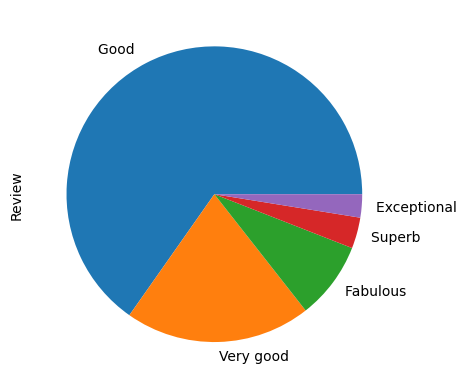

In [122]:
hydhotel['Review'].value_counts().plot(kind='pie')

In [123]:
hydhotel['Review']

0             Good 
1      Exceptional 
2        Very good 
3           Superb 
4        Very good 
           ...     
113      Very good 
114           Good 
115           Good 
116       Fabulous 
117           Good 
Name: Review, Length: 118, dtype: object

In [124]:
hydhotel.to_csv('Hyderabadhotels.csv')


In [1]:
hydhotels

NameError: name 'hydhotels' is not defined

In [125]:
df1=pd.read_csv('Hyderabadhotels.csv')

In [126]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                118 non-null    int64  
 1   Title                     118 non-null    object 
 2   City                      118 non-null    object 
 3   Price(Rs)                 118 non-null    int64  
 4   Tax+Charges(Rs)           118 non-null    int64  
 5   Total Price/night(Rs)     118 non-null    int64  
 6   Rating                    118 non-null    float64
 7   Review                    118 non-null    object 
 8   No of Reviews             118 non-null    object 
 9   Distance from Centre(km)  118 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 9.3+ KB


In [127]:
df1

Unnamed: 0                                              Title       City  \
0             0        Great Spacious Villa with Courtyard Gardens  Hyderabad   
1             1  3BHK Budget Apartment in Hyderabad Near Charminar  Hyderabad   
2             2  KPHB Phase 15 New Stunning 15 BHKs Full Buildi...  Hyderabad   
3             3                       Hotel Lake View Airport zone  Hyderabad   
4             4           Hyderabad Budget Apartment - 2BHK & 1BHK  Hyderabad   
..          ...                                                ...        ...   
113         113          Collection O 81309 Hamsa the Right choice  Hyderabad   
114         114              Capital O Halcyon Inr Suites Madhapur  Hyderabad   
115         115  Townhouse 1065 Hotel S Continental Near Birla ...  Hyderabad   
116         116  Holiday Inn Express Hyderabad Banjara Hills, a...  Hyderabad   
117         117                                  FabHotel Rooms 27  Hyderabad   

     Price(Rs)  Tax+Charges(Rs)  Total Price/night(Rs)  Rating        Review  \
0        10800             1944                  12744     7.1         Good    
1         4800              576                   5376     9.9  Exceptional    
2         4898              588                   5486     8.2    Very good    
3         1596              192                   1788     9.0       Superb    
4         3999              480                   4479     8.0    Very good    
..         ...              ...                    ...     ...           ...   
113       1454              209                   1663     6.8    Very good    
114       2643              334                   2977     7.1         Good    
115        991              144                   1135     8.8         Good    
116       7019              842                   7861     7.5     Fabulous    
117       1617              194                   1811     7.4         Good    

    No of Reviews  Distance from Centre(km)  
0            127                        3.7  
1              9                        7.3  
2            238                        7.2  
3             32                       18.3  
4             17                        4.5  
..            ...                       ...  
113          323                        6.8  
114           95                        6.4  
115           78                        6.2  
116           51                        1.7  
117          192                        6.5  

[118 rows x 10 columns]

In [1]:
!pip install selenium

In [2]:
import re
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from selenium import webdriver

In [3]:
path = r"C:\Users\prasa\Downloads\edgedriver_win64\msedgedriver.exe"

In [4]:
from selenium.webdriver.edge.service import Service
from selenium.webdriver.edge.options import Options

In [5]:
service = Service(executable_path = path)
options = webdriver.EdgeOptions()

In [6]:
driver = webdriver.Edge(service=service, options= options)

In [7]:
driver.get('https://www.booking.com/searchresults.en-gb.html?ss=Mumbai%2C+Maharashtra%2C+India&ssne=Bangalore&ssne_untouched=Bangalore&label=en-in-booking-desktop-FNUJyR1iYZtYeFdNgHudMQS652804038422%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-17218370%3Alp9062120%3Ali%3Adec%3Adm&aid=2336990&lang=en-gb&sb=1&src_elem=sb&src=searchresults&dest_id=-2092174&dest_type=city&ac_position=0&ac_click_type=b&ac_langcode=en&ac_suggestion_list_length=5&search_selected=true&search_pageview_id=79a154d963680219&ac_meta=GhA3OWExNTRkOTYzNjgwMjE5IAAoATICZW46A211bUAASgBQAA%3D%3D&checkin=2023-11-17&checkout=2023-11-18&group_adults=2&no_rooms=1&group_children=0')

In [8]:
soup = BeautifulSoup(driver.page_source, "html.parser")

In [9]:
soup

<html class="b_chrome b_chrome_119 supports_inline-block supports_flexbox_unprefixed supports_fontface hasJS" dir="ltr" lang="en-gb" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# booking_com: http://ogp.me/ns/fb/booking_com#"><head><script async="" src="https://www.google.com/recaptcha/api.js?render=6LfzopcUAAAAAPh4ue2iRjzP6XdxDVpwJigtlmeD&amp;onload=onLoadRecaptchaV3Callback&amp;_=1700020819628"></script><script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-5Q664QZ"></script><script async="" nonce="" src="https://www.google-analytics.com/plugins/ua/ec.js" type="text/javascript"></script><script async="" src="//www.google-analytics.com/analytics.js"></script><script nonce="" type="text/javascript">
document.addEventListener('DOMContentLoaded', function () {
/**
* provides the current user's cookie consent
* in order to use it:
* 1. inline privacy/cookieConsent.js in the page you need to use it.
* please note that this library relies on window.PCM.isCountryNeedCo

In [10]:
soup.find('span',class_='aee5343fdb def9bc142a').text

'Western Suburbs, Mumbai'

In [57]:
Title=[]
location=[]
price=[]
rating=[]
reviewers=[]
TandC=[]
opinion=[]
dfc=[]


for i in range(0,101,25):
    url=f'https://www.booking.com/searchresults.en-gb.html?ss=Mumbai%2C+Maharashtra%2C+India&ssne=Bangalore&ssne_untouched=Bangalore&label=en-in-booking-desktop-FNUJyR1iYZtYeFdNgHudMQS652804038422%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-17218370%3Alp9062120%3Ali%3Adec%3Adm&aid=2336990&lang=en-gb&sb=1&src_elem=sb&src=searchresults&dest_id=-2092174&dest_type=city&ac_position=0&ac_click_type=b&ac_langcode=en&ac_suggestion_list_length=5&search_selected=true&search_pageview_id=79a154d963680219&ac_meta=GhA3OWExNTRkOTYzNjgwMjE5IAAoATICZW46A211bUAASgBQAA%3D%3D&checkin=2023-11-17&checkout=2023-11-18&group_adults=2&no_rooms=1&group_children=0&offset={i}'
    driver.get(url)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    for i in soup.find_all('div',class_='f6431b446c a15b38c233'):
        k=i.text
        if k:
            Title.append(k)
        else:
            Title.append(np.nan)
    for i in soup.find_all('span',class_='aee5343fdb def9bc142a'):
        k=i.text
        
        regex=re.findall('.*(Mumbai)',k)
        if len(regex)==1:
            location.append(regex[0])
    
    for i in soup.find_all('span',class_='f6431b446c fbfd7c1165 e84eb96b1f'):
        k=i.text
        regex=re.findall('\d.+',k)
        if regex:
            price.append(regex[0].replace(',',''))
        else:
            price.append(np.nan)
    for i in soup.find_all('div',class_='a3b8729ab1 d86cee9b25'):
        k=i.text
        if k:
            rating.append(k)
        else:
            rating.append(np.nan)
    for i in soup.find_all('div',class_='abf093bdfe f45d8e4c32 d935416c47'):
        k=i.text
        regex=re.findall('(.*)reviews',k)
        if regex:
            reviewers.append(regex[0].replace(',',''))
        else:
            reviewers.append(np.nan)
    for i in soup.find_all('div',class_='abf093bdfe f45d8e4c32'):
        k=i.text
        regex=re.findall('(\d.+)\staxes',k)
        if regex:
            TandC.append(regex[0].replace(',',''))
    for i in soup.find_all('div',class_='a3b8729ab1 e6208ee469 cb2cbb3ccb'):
        k=i.text
        if k:
            opinion.append(k)
        else:
            opinion.append(np.nan)
    for i in soup.find_all('span',class_='f419a93f12'):
        k=i.text
        regex=re.findall('(.*)\skm',k)
        if regex:
            dfc.append(regex[0])
  


In [58]:
tp=[]
for i in range(0,len(Title)):
    k=int(price[i])+int(TandC[i])
    tp.append(k)

In [59]:
len(Title)

125

In [60]:
len(location)

125

In [61]:
len(price)

125

In [62]:
len(opinion)

124

In [63]:
len(rating)

124

In [64]:
len(dfc)

159

In [65]:
len(TandC)

125

In [66]:
len(tp)

125

In [67]:
mumbai={"Title":Title,"City":location,"Price(Rs)":price,'Tax+Charges(Rs)':TandC,'Total Price/night(Rs)':tp,'Rating':rating,'Review':opinion,'No of Reviews':reviewers,'Distance from Centre(km)':dfc}

In [68]:
mumbai

{'Title': ['Hangout Dormitory For Male & Female Marol',
  'Country Inn By Turtle Hotel and Resort',
  'Country Inn & Suites By Turtle',
  'ITC Grand Central, a Luxury Collection Hotel, Mumbai',
  'Residency Sarovar Portico',
  'FabExpress Prakash Inn',
  'FabHotel Ascot International II',
  'JW Marriott Mumbai Sahar Airport',
  'Hotel Ariana Residency',
  'Country Inn by UMRB',
  'Hotel Icon International Airport Mumbai',
  'Four Seasons Hotel Mumbai',
  'Holiday Inn Mumbai International Airport, an IHG Hotel',
  'FabHotel RK International',
  'Arts International',
  'Treebo Trend Prince, Mumbai',
  'FabExpress Highway Residency',
  'Taj Santacruz',
  'The Ambassador, Marine Drive, Mumbai',
  'Trident Nariman Point',
  'Aster Hotel Near Mumbai Airport',
  'Hotel Golden Park NESCO-Exhibitions Centre',
  'T24 Retro',
  'Hotel A Suites',
  'Hotel Malad Inn opposite Malad Railway Station',
  'Treebo Trend Freedom Star, Vile Parle',
  'JW Marriott Mumbai Juhu',
  'FabHotel Arc Palace',
  'H

In [69]:
df = pd.DataFrame.from_dict(mumbai, orient='index')
df = df.transpose()


In [70]:
df

Title    City Price(Rs)  \
0            Hangout Dormitory For Male & Female Marol  Mumbai       824   
1               Country Inn By Turtle Hotel and Resort  Mumbai      4980   
2                       Country Inn & Suites By Turtle  Mumbai      5400   
3    ITC Grand Central, a Luxury Collection Hotel, ...  Mumbai     11250   
4                            Residency Sarovar Portico  Mumbai      5850   
..                                                 ...     ...       ...   
154                                               None    None      None   
155                                               None    None      None   
156                                               None    None      None   
157                                               None    None      None   
158                                               None    None      None   

    Tax+Charges(Rs) Total Price/night(Rs) Rating         Review No of Reviews  \
0                99                   923    7.3          Good             9    
1               598                  5578    6.9  Review score            43    
2               648                  6048    7.7          Good           145    
3              2025                 13275    8.6      Fabulous          1800    
4               702                  6552    7.0          Good           508    
..              ...                   ...    ...            ...           ...   
154            None                  None   None           None          None   
155            None                  None   None           None          None   
156            None                  None   None           None          None   
157            None                  None   None           None          None   
158            None                  None   None           None          None   

    Distance from Centre(km)  
0                        4.6  
1                        7.2  
2                          2  
3                        7.2  
4                          2  
..                       ...  
154                      0.9  
155                     15.1  
156                        2  
157                      3.9  
158                      1.7  

[159 rows x 9 columns]

In [71]:
df.isnull().sum()

Title                       34
City                        34
Price(Rs)                   34
Tax+Charges(Rs)             34
Total Price/night(Rs)       34
Rating                      35
Review                      35
No of Reviews               37
Distance from Centre(km)     0
dtype: int64

In [72]:
mumbaihotel=df.dropna()
mumbaihotel

Title    City Price(Rs)  \
0            Hangout Dormitory For Male & Female Marol  Mumbai       824   
1               Country Inn By Turtle Hotel and Resort  Mumbai      4980   
2                       Country Inn & Suites By Turtle  Mumbai      5400   
3    ITC Grand Central, a Luxury Collection Hotel, ...  Mumbai     11250   
4                            Residency Sarovar Portico  Mumbai      5850   
..                                                 ...     ...       ...   
119                  Treebo Trend Prime Grand, Andheri  Mumbai      2566   
120                                        Hotel Olten  Mumbai      3200   
121                                      T24 Residency  Mumbai      6999   
122                    Hotel Embassy Park - BKC Mumbai  Mumbai      3400   
123                     Hostel Vasantashram CST Mumbai  Mumbai      2088   

    Tax+Charges(Rs) Total Price/night(Rs) Rating         Review No of Reviews  \
0                99                   923    7.3          Good             9    
1               598                  5578    6.9  Review score            43    
2               648                  6048    7.7          Good           145    
3              2025                 13275    8.6      Fabulous          1800    
4               702                  6552    7.0          Good           508    
..              ...                   ...    ...            ...           ...   
119             308                  2874    6.5  Review score            90    
120             384                  3584    6.9  Review score           348    
121             840                  7839    7.1          Good           350    
122             408                  3808    7.3          Good           297    
123             251                  2339    3.0  Review score             8    

    Distance from Centre(km)  
0                        4.6  
1                        7.2  
2                          2  
3                        7.2  
4                          2  
..                       ...  
119                     24.5  
120                      7.4  
121                      1.9  
122                     14.3  
123                      6.7  

[122 rows x 9 columns]

In [73]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
mumbaihotel.loc[mumbaihotel['Review']=='Review score ']=mumbaihotel.loc[mumbaihotel['Review']=='Review score '].replace('Review score ',np.nan)

In [75]:
for i in mumbaihotel['Rating']:
    if float(i) < 8.0:
        mumbaihotel['Review']=mumbaihotel['Review'].fillna('Good ')
    elif float(i) > 9.5:
        mumbaihotel['Review']=mumbaihotel['Review'].fillna('Exceptional')

In [76]:
mumbaihotel.to_csv('Mumbaihotels.csv')

In [77]:
df1=pd.read_csv('Mumbaihotels.csv')

In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                122 non-null    int64  
 1   Title                     122 non-null    object 
 2   City                      122 non-null    object 
 3   Price(Rs)                 122 non-null    int64  
 4   Tax+Charges(Rs)           122 non-null    int64  
 5   Total Price/night(Rs)     122 non-null    int64  
 6   Rating                    122 non-null    float64
 7   Review                    122 non-null    object 
 8   No of Reviews             122 non-null    int64  
 9   Distance from Centre(km)  122 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 9.7+ KB


In [79]:
df1

Unnamed: 0                                              Title    City  \
0             0          Hangout Dormitory For Male & Female Marol  Mumbai   
1             1             Country Inn By Turtle Hotel and Resort  Mumbai   
2             2                     Country Inn & Suites By Turtle  Mumbai   
3             3  ITC Grand Central, a Luxury Collection Hotel, ...  Mumbai   
4             4                          Residency Sarovar Portico  Mumbai   
..          ...                                                ...     ...   
117         119                  Treebo Trend Prime Grand, Andheri  Mumbai   
118         120                                        Hotel Olten  Mumbai   
119         121                                      T24 Residency  Mumbai   
120         122                    Hotel Embassy Park - BKC Mumbai  Mumbai   
121         123                     Hostel Vasantashram CST Mumbai  Mumbai   

     Price(Rs)  Tax+Charges(Rs)  Total Price/night(Rs)  Rating     Review  \
0          824               99                    923     7.3      Good    
1         4980              598                   5578     6.9      Good    
2         5400              648                   6048     7.7      Good    
3        11250             2025                  13275     8.6  Fabulous    
4         5850              702                   6552     7.0      Good    
..         ...              ...                    ...     ...        ...   
117       2566              308                   2874     6.5      Good    
118       3200              384                   3584     6.9      Good    
119       6999              840                   7839     7.1      Good    
120       3400              408                   3808     7.3      Good    
121       2088              251                   2339     3.0      Good    

     No of Reviews  Distance from Centre(km)  
0                9                       4.6  
1               43                       7.2  
2              145                       2.0  
3             1800                       7.2  
4              508                       2.0  
..             ...                       ...  
117             90                      24.5  
118            348                       7.4  
119            350                       1.9  
120            297                      14.3  
121              8                       6.7  

[122 rows x 10 columns]

In [1]:
!pip install selenium

In [2]:
import re
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import numpy as np
import pandas as pd

In [3]:
path = r"C:\Users\prasa\Downloads\edgedriver_win64\msedgedriver.exe"

In [4]:
from selenium.webdriver.edge.service import Service
from selenium.webdriver.edge.options import Options

In [5]:
service = Service(executable_path = path)
options = webdriver.EdgeOptions()

In [6]:
driver = webdriver.Edge(service=service, options= options)

In [7]:
driver.get('https://www.booking.com/searchresults.en-gb.html?ss=Chennai%2C+Tamil+Nadu%2C+India&ssne=Mumbai&ssne_untouched=Mumbai&label=en-in-booking-desktop-FNUJyR1iYZtYeFdNgHudMQS652804038422%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-17218370%3Alp9062120%3Ali%3Adec%3Adm&aid=2336990&lang=en-gb&sb=1&src_elem=sb&src=searchresults&dest_id=-2103041&dest_type=city&ac_position=0&ac_click_type=b&ac_langcode=en&ac_suggestion_list_length=5&search_selected=true&search_pageview_id=3d76579d7a8f0053&ac_meta=GhAzZDc2NTc5ZDdhOGYwMDUzIAAoATICZW46B2NoZW5uYWlAAEoAUAA%3D&checkin=2023-11-17&checkout=2023-11-18&group_adults=2&no_rooms=1&group_children=0')

In [8]:
soup = BeautifulSoup(driver.page_source, "html.parser")

In [9]:
soup

<html class="b_chrome b_chrome_119 supports_inline-block supports_flexbox_unprefixed supports_fontface hasJS" lang="en-gb" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# booking_com: http://ogp.me/ns/fb/booking_com#"><head><script async="" src="https://www.google.com/recaptcha/api.js?render=6LfzopcUAAAAAPh4ue2iRjzP6XdxDVpwJigtlmeD&amp;onload=onLoadRecaptchaV3Callback&amp;_=1700020919489"></script><script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-5Q664QZ"></script><script async="" nonce="" src="https://www.google-analytics.com/plugins/ua/ec.js" type="text/javascript"></script><script async="" src="//www.google-analytics.com/analytics.js"></script><script nonce="" type="text/javascript">
document.addEventListener('DOMContentLoaded', function () {
/**
* provides the current user's cookie consent
* in order to use it:
* 1. inline privacy/cookieConsent.js in the page you need to use it.
* please note that this library relies on window.PCM.isCountryNeedCookieBanner

In [10]:
soup.find('span',class_='aee5343fdb def9bc142a')

<span class="aee5343fdb def9bc142a" data-testid="address">T - Nagar, Chennai</span>

In [63]:
Title=[]
location=[]
price=[]
rating=[]
reviewers=[]
TandC=[]
opinion=[]
dfc=[]


for i in range(0,101,25):
    url=f'https://www.booking.com/searchresults.en-gb.html?ss=Chennai%2C+Tamil+Nadu%2C+India&ssne=Mumbai&ssne_untouched=Mumbai&label=en-in-booking-desktop-FNUJyR1iYZtYeFdNgHudMQS652804038422%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-17218370%3Alp9062120%3Ali%3Adec%3Adm&aid=2336990&lang=en-gb&sb=1&src_elem=sb&src=searchresults&dest_id=-2103041&dest_type=city&ac_position=0&ac_click_type=b&ac_langcode=en&ac_suggestion_list_length=5&search_selected=true&search_pageview_id=3d76579d7a8f0053&ac_meta=GhAzZDc2NTc5ZDdhOGYwMDUzIAAoATICZW46B2NoZW5uYWlAAEoAUAA%3D&checkin=2023-11-17&checkout=2023-11-18&group_adults=2&no_rooms=1&group_children=0&offset={i}'
    driver.get(url)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    for i in soup.find_all('div',class_='f6431b446c a15b38c233'):
        k=i.text
        if k:
            Title.append(k)
        else:
            Title.append(np.nan)
    for i in soup.find_all('span',class_='aee5343fdb def9bc142a'):
        k=i.text
        
        regex=re.findall('.*(Chennai)',k)
        if len(regex)==1:
            location.append(regex[0])
    
    for i in soup.find_all('span',class_='f6431b446c fbfd7c1165 e84eb96b1f'):
        k=i.text
        regex=re.findall('\d.+',k)
        if regex:
            price.append(regex[0].replace(',',''))
        else:
            price.append(np.nan)
    for i in soup.find_all('div',class_='a3b8729ab1 d86cee9b25'):
        k=i.text
        if k:
            rating.append(k)
        else:
            rating.append(np.nan)
    for i in soup.find_all('div',class_='abf093bdfe f45d8e4c32 d935416c47'):
        k=i.text
        regex=re.findall('(.*)reviews',k)
        if regex:
            reviewers.append(regex[0].replace(',',''))
        else:
            reviewers.append(np.nan)
    for i in soup.find_all('div',class_='abf093bdfe f45d8e4c32'):
        k=i.text
        regex=re.findall('(\d.+)\staxes',k)
        if regex:
            TandC.append(regex[0].replace(',',''))
    for i in soup.find_all('div',class_='a3b8729ab1 e6208ee469 cb2cbb3ccb'):
        k=i.text
        if k:
            opinion.append(k)
        else:
            opinion.append(np.nan)
    for i in soup.find_all('span',class_='f419a93f12'):
        k=i.text
        regex=re.findall('(.*)\skm',k)
        if regex:
            dfc.append(regex[0])
  


In [64]:
tp=[]
for i in range(1,len(Title)-1):
    k=int(price[i])+int(TandC[i])
    tp.append(k)

In [65]:
len(Title)

125

In [66]:
len(location)

125

In [67]:
len(price)

125

In [68]:
len(TandC)

124

In [69]:
len(reviewers)

122

In [70]:
len(rating)

122

In [71]:
len(opinion)

122

In [72]:
len(dfc)

161

In [73]:
len(tp)

123

In [74]:
chennai={"Title":Title,"City":location,"Price(Rs)":price,'Tax+Charges(Rs)':TandC,'Total Price/night(Rs)':tp,'Rating':rating,'Review':opinion,'No of Reviews':reviewers,'Distance from Centre(km)':dfc}

In [75]:
chennai

{'Title': ['Courtyard by Marriott Chennai',
  'Radisson Blu Hotel GRT, Chennai International Airport',
  'Taj Club House',
  'Hotel Ambika Palace',
  'Citadines OMR Chennai',
  'OYO Flagship Grand Residency Near Kasi Talkies',
  'Ibis Chennai OMR - An Accor Brand',
  'Hotel Comfort Park - Opposite Sri Ramachandra Medical College Porur',
  'Park Hyatt Chennai',
  'Treebo Trend Elan - 4 Km Away From MA Chidambaram Stadium, Chennai',
  'Hyatt Regency Chennai',
  'OYO Flagship BKM Guest House',
  'FabHotel Nestlay Rooms Airport',
  'Novotel Chennai Sipcot',
  'ITC Grand Chola, a Luxury Collection Hotel, Chennai',
  'Novotel Chennai Chamiers Road',
  'Trident Chennai',
  'Radisson Blu Hotel Chennai City Centre',
  'Novotel Chennai OMR',
  'SIU Mansion',
  'SPOT ON Ams Annex',
  'Hotel Kamar Residences and Banquets',
  'The Leela Palace Chennai',
  'FabHotel Earth',
  'FabHotel Sri Krishna Residency Airport',
  'FabHotel Golden Swan Chennai Airport Free Pickup & Drop',
  'Taj Connemara, Chen

In [76]:
df = pd.DataFrame.from_dict(chennai, orient='index')
df = df.transpose()

In [77]:
df

Title     City Price(Rs)  \
0                        Courtyard by Marriott Chennai  Chennai      6000   
1    Radisson Blu Hotel GRT, Chennai International ...  Chennai      9250   
2                                       Taj Club House  Chennai      6000   
3                                  Hotel Ambika Palace  Chennai       680   
4                                Citadines OMR Chennai  Chennai      4050   
..                                                 ...      ...       ...   
156                                               None     None      None   
157                                               None     None      None   
158                                               None     None      None   
159                                               None     None      None   
160                                               None     None      None   

    Tax+Charges(Rs) Total Price/night(Rs) Rating      Review No of Reviews  \
0              1080                 10915    8.2  Very good          1384    
1              1665                  6720    8.9   Fabulous           422    
2               720                   762    7.9       Good          1412    
3                82                  4536    7.8       Good            53    
4               486                   546    8.4  Very good          2261    
..              ...                   ...    ...         ...           ...   
156            None                  None   None        None          None   
157            None                  None   None        None          None   
158            None                  None   None        None          None   
159            None                  None   None        None          None   
160            None                  None   None        None          None   

    Distance from Centre(km)  
0                        1.7  
1                        7.2  
2                          4  
3                          2  
4                          5  
..                       ...  
156                        6  
157                      2.4  
158                      7.9  
159                      2.3  
160                      2.3  

[161 rows x 9 columns]

In [78]:
df.isnull().sum()

Title                       36
City                        36
Price(Rs)                   36
Tax+Charges(Rs)             37
Total Price/night(Rs)       38
Rating                      39
Review                      39
No of Reviews               40
Distance from Centre(km)     0
dtype: int64

In [79]:
chennaihotel=df.dropna()
chennaihotel

Title     City Price(Rs)  \
0                        Courtyard by Marriott Chennai  Chennai      6000   
1    Radisson Blu Hotel GRT, Chennai International ...  Chennai      9250   
2                                       Taj Club House  Chennai      6000   
3                                  Hotel Ambika Palace  Chennai       680   
4                                Citadines OMR Chennai  Chennai      4050   
..                                                 ...      ...       ...   
117                                   JP Chennai Hotel  Chennai      6044   
118                                   Green Tree Hotel  Chennai      1800   
119                                      Hotel Ranjith  Chennai      5000   
120                             Park Plaza Chennai OMR  Chennai      4200   
121                           Aum Karthikeya Residency  Chennai       611   

    Tax+Charges(Rs) Total Price/night(Rs) Rating         Review No of Reviews  \
0              1080                 10915    8.2     Very good          1384    
1              1665                  6720    8.9      Fabulous           422    
2               720                   762    7.9          Good          1412    
3                82                  4536    7.8          Good            53    
4               486                   546    8.4     Very good          2261    
..              ...                   ...    ...            ...           ...   
117             216                  2400    7.1          Good           280    
118             600                  5504    5.2  Review score            79    
119             504                  4273    5.8  Review score            10    
120              73                   833    8.6      Fabulous            27    
121             222                  2106    7.9          Good           429    

    Distance from Centre(km)  
0                        1.7  
1                        7.2  
2                          4  
3                          2  
4                          5  
..                       ...  
117                      1.6  
118                      7.4  
119                     21.9  
120                        3  
121                     24.6  

[121 rows x 9 columns]

In [80]:
import warnings
warnings.filterwarnings('ignore')

In [81]:
chennaihotel.loc[chennaihotel['Review']=='Review score ']=chennaihotel.loc[chennaihotel['Review']=='Review score '].replace('Review score ',np.nan)

In [82]:
for i in chennaihotel['Rating']:
    if float(i) < 8.0:
        chennaihotel['Review']=chennaihotel['Review'].fillna('Good ')
    if float(i) > 9.5:
        chennaihotel['Review']=chennaihotel['Review'].fillna('Exceptional')

In [83]:
chennaihotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 121
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Title                     121 non-null    object
 1   City                      121 non-null    object
 2   Price(Rs)                 121 non-null    object
 3   Tax+Charges(Rs)           121 non-null    object
 4   Total Price/night(Rs)     121 non-null    object
 5   Rating                    121 non-null    object
 6   Review                    121 non-null    object
 7   No of Reviews             121 non-null    object
 8   Distance from Centre(km)  121 non-null    object
dtypes: object(9)
memory usage: 9.5+ KB


In [84]:
chennaihotel.to_csv('Chennaihotels.csv')

In [85]:
df1=pd.read_csv('Chennaihotels.csv')

In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                121 non-null    int64  
 1   Title                     121 non-null    object 
 2   City                      121 non-null    object 
 3   Price(Rs)                 121 non-null    int64  
 4   Tax+Charges(Rs)           121 non-null    int64  
 5   Total Price/night(Rs)     121 non-null    int64  
 6   Rating                    121 non-null    float64
 7   Review                    121 non-null    object 
 8   No of Reviews             121 non-null    int64  
 9   Distance from Centre(km)  121 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 9.6+ KB


In [87]:
df1

Unnamed: 0                                              Title     City  \
0             0                      Courtyard by Marriott Chennai  Chennai   
1             1  Radisson Blu Hotel GRT, Chennai International ...  Chennai   
2             2                                     Taj Club House  Chennai   
3             3                                Hotel Ambika Palace  Chennai   
4             4                              Citadines OMR Chennai  Chennai   
..          ...                                                ...      ...   
116         117                                   JP Chennai Hotel  Chennai   
117         118                                   Green Tree Hotel  Chennai   
118         119                                      Hotel Ranjith  Chennai   
119         120                             Park Plaza Chennai OMR  Chennai   
120         121                           Aum Karthikeya Residency  Chennai   

     Price(Rs)  Tax+Charges(Rs)  Total Price/night(Rs)  Rating      Review  \
0         6000             1080                  10915     8.2  Very good    
1         9250             1665                   6720     8.9   Fabulous    
2         6000              720                    762     7.9       Good    
3          680               82                   4536     7.8       Good    
4         4050              486                    546     8.4  Very good    
..         ...              ...                    ...     ...         ...   
116       6044              216                   2400     7.1       Good    
117       1800              600                   5504     5.2       Good    
118       5000              504                   4273     5.8       Good    
119       4200               73                    833     8.6   Fabulous    
120        611              222                   2106     7.9       Good    

     No of Reviews  Distance from Centre(km)  
0             1384                       1.7  
1              422                       7.2  
2             1412                       4.0  
3               53                       2.0  
4             2261                       5.0  
..             ...                       ...  
116            280                       1.6  
117             79                       7.4  
118             10                      21.9  
119             27                       3.0  
120            429                      24.6  

[121 rows x 10 columns]

In [1]:
!pip install selenium

In [2]:
import re
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from selenium import webdriver

In [3]:
path = r"C:\Users\prasa\Downloads\edgedriver_win64\msedgedriver.exe"

In [4]:
from selenium.webdriver.edge.service import Service
from selenium.webdriver.edge.options import Options

In [5]:
service = Service(executable_path = path)
options = webdriver.EdgeOptions()

In [6]:
driver = webdriver.Edge(service=service, options= options)

In [7]:
driver.get('https://www.booking.com/searchresults.en-gb.html?ss=Bangalore%2C+Karnataka%2C+India&ssne=Hyderabad&ssne_untouched=Hyderabad&label=en-in-booking-desktop-FNUJyR1iYZtYeFdNgHudMQS652804038422%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-17218370%3Alp9062120%3Ali%3Adec%3Adm&aid=2336990&lang=en-gb&sb=1&src_elem=sb&src=searchresults&dest_id=-2090174&dest_type=city&ac_position=0&ac_click_type=b&ac_langcode=en&ac_suggestion_list_length=5&search_selected=true&search_pageview_id=4dd954d0c1d70091&ac_meta=GhA0ZGQ5NTRkMGMxZDcwMDkxIAAoATICZW46A2JhbkAASgBQAA%3D%3D&checkin=2023-11-17&checkout=2023-11-18&group_adults=2&no_rooms=1&group_children=0')

In [8]:
soup = BeautifulSoup(driver.page_source, "html.parser")

In [9]:
soup

<html class="b_chrome b_chrome_119 supports_inline-block supports_flexbox_unprefixed supports_fontface hasJS" lang="en-gb" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# booking_com: http://ogp.me/ns/fb/booking_com#"><head><script async="" src="https://www.google.com/recaptcha/api.js?render=6LfzopcUAAAAAPh4ue2iRjzP6XdxDVpwJigtlmeD&amp;onload=onLoadRecaptchaV3Callback&amp;_=1700021092686"></script><script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-5Q664QZ"></script><script async="" nonce="" src="https://www.google-analytics.com/plugins/ua/ec.js" type="text/javascript"></script><script async="" src="//www.google-analytics.com/analytics.js"></script><script nonce="" type="text/javascript">
document.addEventListener('DOMContentLoaded', function () {
/**
* provides the current user's cookie consent
* in order to use it:
* 1. inline privacy/cookieConsent.js in the page you need to use it.
* please note that this library relies on window.PCM.isCountryNeedCookieBanner

In [10]:
soup.find('span',class_='aee5343fdb def9bc142a').text

'Bangalore'

In [59]:
Title=[]
location=[]
price=[]
rating=[]
reviewers=[]
TandC=[]
opinion=[]
dfc=[]


for i in range(0,101,25):
    url=f'https://www.booking.com/searchresults.en-gb.html?ss=Bangalore%2C+Karnataka%2C+India&ssne=Hyderabad&ssne_untouched=Hyderabad&label=en-in-booking-desktop-FNUJyR1iYZtYeFdNgHudMQS652804038422%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-17218370%3Alp9062120%3Ali%3Adec%3Adm&aid=2336990&lang=en-gb&sb=1&src_elem=sb&src=searchresults&dest_id=-2090174&dest_type=city&ac_position=0&ac_click_type=b&ac_langcode=en&ac_suggestion_list_length=5&search_selected=true&search_pageview_id=4dd954d0c1d70091&ac_meta=GhA0ZGQ5NTRkMGMxZDcwMDkxIAAoATICZW46A2JhbkAASgBQAA%3D%3D&checkin=2023-11-17&checkout=2023-11-18&group_adults=2&no_rooms=1&group_children=0&offset={i}'
    driver.get(url)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    for i in soup.find_all('div',class_='f6431b446c a15b38c233'):
        k=i.text
        if k:
            Title.append(k)
        else:
            Title.append(np.nan)
    for i in soup.find_all('span',class_='aee5343fdb def9bc142a'):
        k=i.text
        
        regex=re.findall('.*(Bangalore)',k)
        if len(regex)==1:
            location.append(regex[0])
    
    for i in soup.find_all('span',class_='f6431b446c fbfd7c1165 e84eb96b1f'):
        k=i.text
        regex=re.findall('\d.+',k)
        if regex:
            price.append(regex[0].replace(',',''))
        else:
            price.append(np.nan)
    for i in soup.find_all('div',class_='a3b8729ab1 d86cee9b25'):
        k=i.text
        if k:
            rating.append(k)
        else:
            rating.append(np.nan)
    for i in soup.find_all('div',class_='abf093bdfe f45d8e4c32 d935416c47'):
        k=i.text
        regex=re.findall('(.*)reviews',k)
        if regex:
            reviewers.append(regex[0].replace(',',''))
        else:
            reviewers.append(np.nan)
    for i in soup.find_all('div',class_='abf093bdfe f45d8e4c32'):
        k=i.text
        regex=re.findall('(\d.+)\staxes',k)
        if regex:
            TandC.append(regex[0].replace(',',''))
    for i in soup.find_all('div',class_='a3b8729ab1 e6208ee469 cb2cbb3ccb'):
        k=i.text
        if k:
            opinion.append(k)
        else:
            opinion.append(np.nan)
    for i in soup.find_all('span',class_='f419a93f12'):
        k=i.text
        regex=re.findall('(.*)\skm',k)
        if regex:
            dfc.append(regex[0])
  


In [60]:
tp=[]
for i in range(0,len(Title)):
    k=int(price[i])+int(TandC[i])
    tp.append(k)

In [61]:
len(Title)

125

In [62]:
len(price)

125

In [63]:
len(location)

125

In [64]:
len(TandC)

125

In [65]:
len(reviewers)

124

In [66]:
len(rating)

124

In [67]:
len(dfc)

124

In [68]:
len(opinion)

124

In [69]:
len(tp)

125

In [70]:
bglr={"Title":Title,"City":location,"Price(Rs)":price,'Tax+Charges(Rs)':TandC,'Total Price/night(Rs)':tp,'Rating':rating,'Review':opinion,'No of Reviews':reviewers,'Distance from Centre(km)':dfc}

In [71]:
bglr

{'Title': ['The Hosteller Bangalore, Brigade Road',
  'VOVO PREMIER HOTEL',
  'Vera by Bisque Hebbal - Manyata Tech Park',
  'Regenta Inn Indiranagar Bangalore',
  'Hotel Chetan International',
  'ITC Windsor, a Luxury Collection Hotel, Bengaluru',
  'The Hosteller Bangalore, Koramangala',
  'Hyatt Centric MG Road Bangalore',
  'Collection O Hotel Blueberry Near 7D Voyage',
  'Yello! ITPL',
  'The Leela Bhartiya City Bengaluru',
  'Radisson Blu Atria Bengaluru',
  'The Oberoi Bengaluru',
  'Vivanta Bengaluru Residency Road',
  'Olive Electronic City - by Embassy Group',
  'Radisson Bengaluru City Center',
  'Narthaki Boutique Hotel',
  'The Curzon Court',
  'Radisson Blu Bengaluru Outer Ring Road',
  'Bloom Hotel - Brookefield',
  'Tulip Inn Koramangala',
  'Casa Cottage',
  'FabHotel Phoenix Resorts',
  'Olive HAL 2nd Stage - by Embassy Group',
  'Renaissance Bengaluru Race Course Hotel',
  'Olive Kalyan Nagar - By Embassy Group',
  'Taj Yeshwantpur Bengaluru',
  'Welcomhotel by ITC H

In [72]:
df = pd.DataFrame.from_dict(bglr, orient='index')
df = df.transpose()


In [73]:
df

Title       City Price(Rs)  \
0                The Hosteller Bangalore, Brigade Road  Bangalore      2793   
1                                   VOVO PREMIER HOTEL  Bangalore      2025   
2            Vera by Bisque Hebbal - Manyata Tech Park  Bangalore      2699   
3                    Regenta Inn Indiranagar Bangalore  Bangalore      3146   
4                           Hotel Chetan International  Bangalore      1280   
..                                                 ...        ...       ...   
120                                    Stayhome Suites  Bangalore      2330   
121           Grand Mercure Bangalore - An Accor Brand  Bangalore      9700   
122         Olive Indiranagar Metro - by Embassy Group  Bangalore      3018   
123      Luxurious 3BHK in 23rd floor of Bhartiya City  Bangalore      5400   
124  Treebo Trend Elite 7 - 5 Km Away From Chinnasw...  Bangalore      2739   

    Tax+Charges(Rs) Total Price/night(Rs) Rating         Review No of Reviews  \
0               335                  3128    8.9      Fabulous           154    
1               243                  2268    8.6      Fabulous           327    
2               324                  3023    8.7      Fabulous            69    
3               378                  3524    8.3     Very good          1051    
4               154                  1434    6.9  Review score           767    
..              ...                   ...    ...            ...           ...   
120             280                  2610    8.2     Very good           530    
121            1746                 11446    8.1     Very good           118    
122             422                  3440     10   Exceptional             2    
123             648                  6048    8.4     Very good            50    
124             329                  3068   None           None          None   

    Distance from Centre(km)  
0                        1.1  
1                        2.7  
2                        7.3  
3                        4.2  
4                        2.6  
..                       ...  
120                      5.9  
121                      3.8  
122                     13.1  
123                      4.4  
124                     None  

[125 rows x 9 columns]

In [74]:
df.isnull().sum()

Title                       0
City                        0
Price(Rs)                   0
Tax+Charges(Rs)             0
Total Price/night(Rs)       0
Rating                      1
Review                      1
No of Reviews               2
Distance from Centre(km)    1
dtype: int64

In [75]:
bglrhotel=df.dropna()
bglrhotel

Title       City Price(Rs)  \
0            The Hosteller Bangalore, Brigade Road  Bangalore      2793   
1                               VOVO PREMIER HOTEL  Bangalore      2025   
2        Vera by Bisque Hebbal - Manyata Tech Park  Bangalore      2699   
3                Regenta Inn Indiranagar Bangalore  Bangalore      3146   
4                       Hotel Chetan International  Bangalore      1280   
..                                             ...        ...       ...   
119          Astra Hotels and Suites - Koramangala  Bangalore      1999   
120                                Stayhome Suites  Bangalore      2330   
121       Grand Mercure Bangalore - An Accor Brand  Bangalore      9700   
122     Olive Indiranagar Metro - by Embassy Group  Bangalore      3018   
123  Luxurious 3BHK in 23rd floor of Bhartiya City  Bangalore      5400   

    Tax+Charges(Rs) Total Price/night(Rs) Rating         Review No of Reviews  \
0               335                  3128    8.9      Fabulous           154    
1               243                  2268    8.6      Fabulous           327    
2               324                  3023    8.7      Fabulous            69    
3               378                  3524    8.3     Very good          1051    
4               154                  1434    6.9  Review score           767    
..              ...                   ...    ...            ...           ...   
119             240                  2239    8.6      Fabulous            89    
120             280                  2610    8.2     Very good           530    
121            1746                 11446    8.1     Very good           118    
122             422                  3440     10   Exceptional             2    
123             648                  6048    8.4     Very good            50    

    Distance from Centre(km)  
0                        1.1  
1                        2.7  
2                        7.3  
3                        4.2  
4                        2.6  
..                       ...  
119                      8.8  
120                      5.9  
121                      3.8  
122                     13.1  
123                      4.4  

[123 rows x 9 columns]

In [76]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
bglrhotel.loc[bglrhotel['Review']=='Review score ']=bglrhotel.loc[bglrhotel['Review']=='Review score '].replace('Review score ',np.nan)

In [78]:
for i in bglrhotel['Rating']:
    if float(i) < 8.0:
        bglrhotel['Review']=bglrhotel['Review'].fillna('Good ')
    if float(i) > 9.5:
        bglrhotel['Review']=bglrhotel['Review'].fillna('Exceptional')

In [79]:
bglrhotel.to_csv('Bangalorehotels.csv')

In [80]:
df1=pd.read_csv('Bangalorehotels.csv')

In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                123 non-null    int64  
 1   Title                     123 non-null    object 
 2   City                      123 non-null    object 
 3   Price(Rs)                 123 non-null    int64  
 4   Tax+Charges(Rs)           123 non-null    int64  
 5   Total Price/night(Rs)     123 non-null    int64  
 6   Rating                    123 non-null    float64
 7   Review                    123 non-null    object 
 8   No of Reviews             123 non-null    int64  
 9   Distance from Centre(km)  123 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 9.7+ KB


In [82]:
df1

Unnamed: 0                                          Title       City  \
0             0          The Hosteller Bangalore, Brigade Road  Bangalore   
1             1                             VOVO PREMIER HOTEL  Bangalore   
2             2      Vera by Bisque Hebbal - Manyata Tech Park  Bangalore   
3             3              Regenta Inn Indiranagar Bangalore  Bangalore   
4             4                     Hotel Chetan International  Bangalore   
..          ...                                            ...        ...   
118         119          Astra Hotels and Suites - Koramangala  Bangalore   
119         120                                Stayhome Suites  Bangalore   
120         121       Grand Mercure Bangalore - An Accor Brand  Bangalore   
121         122     Olive Indiranagar Metro - by Embassy Group  Bangalore   
122         123  Luxurious 3BHK in 23rd floor of Bhartiya City  Bangalore   

     Price(Rs)  Tax+Charges(Rs)  Total Price/night(Rs)  Rating        Review  \
0         2793              335                   3128     8.9     Fabulous    
1         2025              243                   2268     8.6     Fabulous    
2         2699              324                   3023     8.7     Fabulous    
3         3146              378                   3524     8.3    Very good    
4         1280              154                   1434     6.9         Good    
..         ...              ...                    ...     ...           ...   
118       1999              240                   2239     8.6     Fabulous    
119       2330              280                   2610     8.2    Very good    
120       9700             1746                  11446     8.1    Very good    
121       3018              422                   3440    10.0  Exceptional    
122       5400              648                   6048     8.4    Very good    

     No of Reviews  Distance from Centre(km)  
0              154                       1.1  
1              327                       2.7  
2               69                       7.3  
3             1051                       4.2  
4              767                       2.6  
..             ...                       ...  
118             89                       8.8  
119            530                       5.9  
120            118                       3.8  
121              2                      13.1  
122             50                       4.4  

[123 rows x 10 columns]